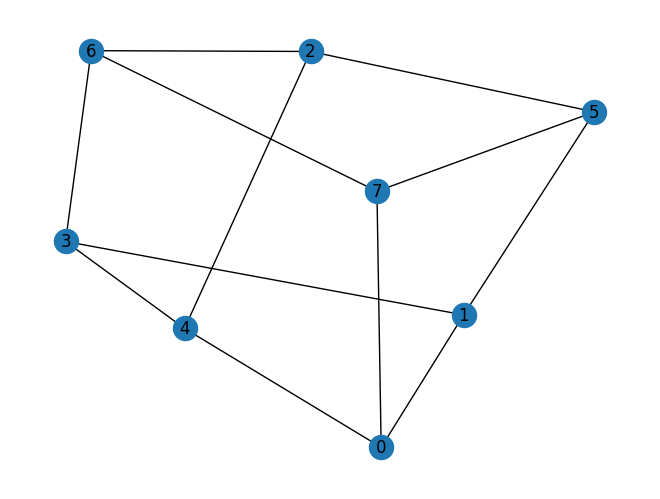

In [14]:
from find_cubic_local_mincut import *
import matplotlib.pyplot as plt

from cat_state.cat_graphs_random import find_small_nonlocal_cut

N, T = 32, 7

if G := generate_high_girth_cubic_graph(N, T, max_tries=1_000_000):
    nx.draw(G, with_labels=True)
else:
    print("No graph found")

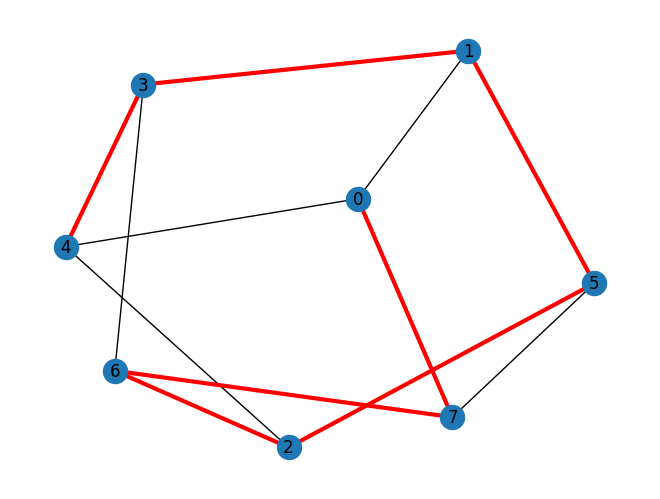

In [15]:
from cat_state_generation import *

p = next(find_all_hamiltonian_paths(G))
pos = nx.drawing.layout.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(
    G, pos=pos,
    edgelist=list(zip(p, p[1:])),
    edge_color='red', width=3.0
)

T = 5
N = 9


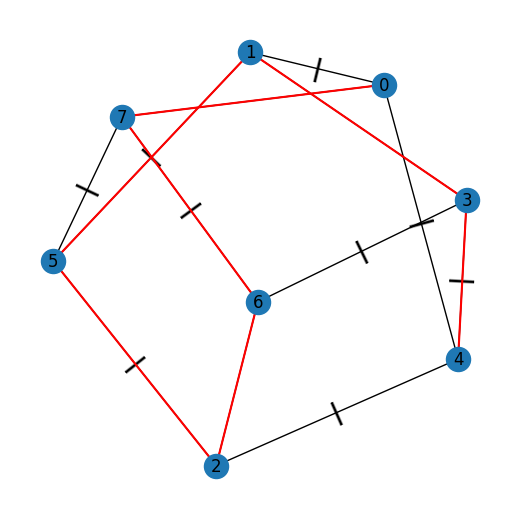

In [16]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
from pysat.formula import WCNF
from pysat.examples.rc2 import RC2

# --- 3. Run and Compare ---

# Create a graph
marker = GraphMarker(G, ham_path=list(zip(p, p[1:])), max_marks=30)

print("T = 5")
res1 = marker.find_solution(T = 4)
print(f"N = {sum(v for k, v in res1.items())}")
visualize_cat_state_base(G, list(zip(p, p[1:])), res1)

# print("T = 5")
# res2 = marker.solve_problem_2()
# print(f"N = {sum(v for k, v in res2.items())}")
# visualize_markings(G, res2)
#
# print("T = 6")
# res3 = marker.solve_problem_3()
# print(f"N = {sum(v for k, v in res3.items())}")
# visualize_markings(G, res3)

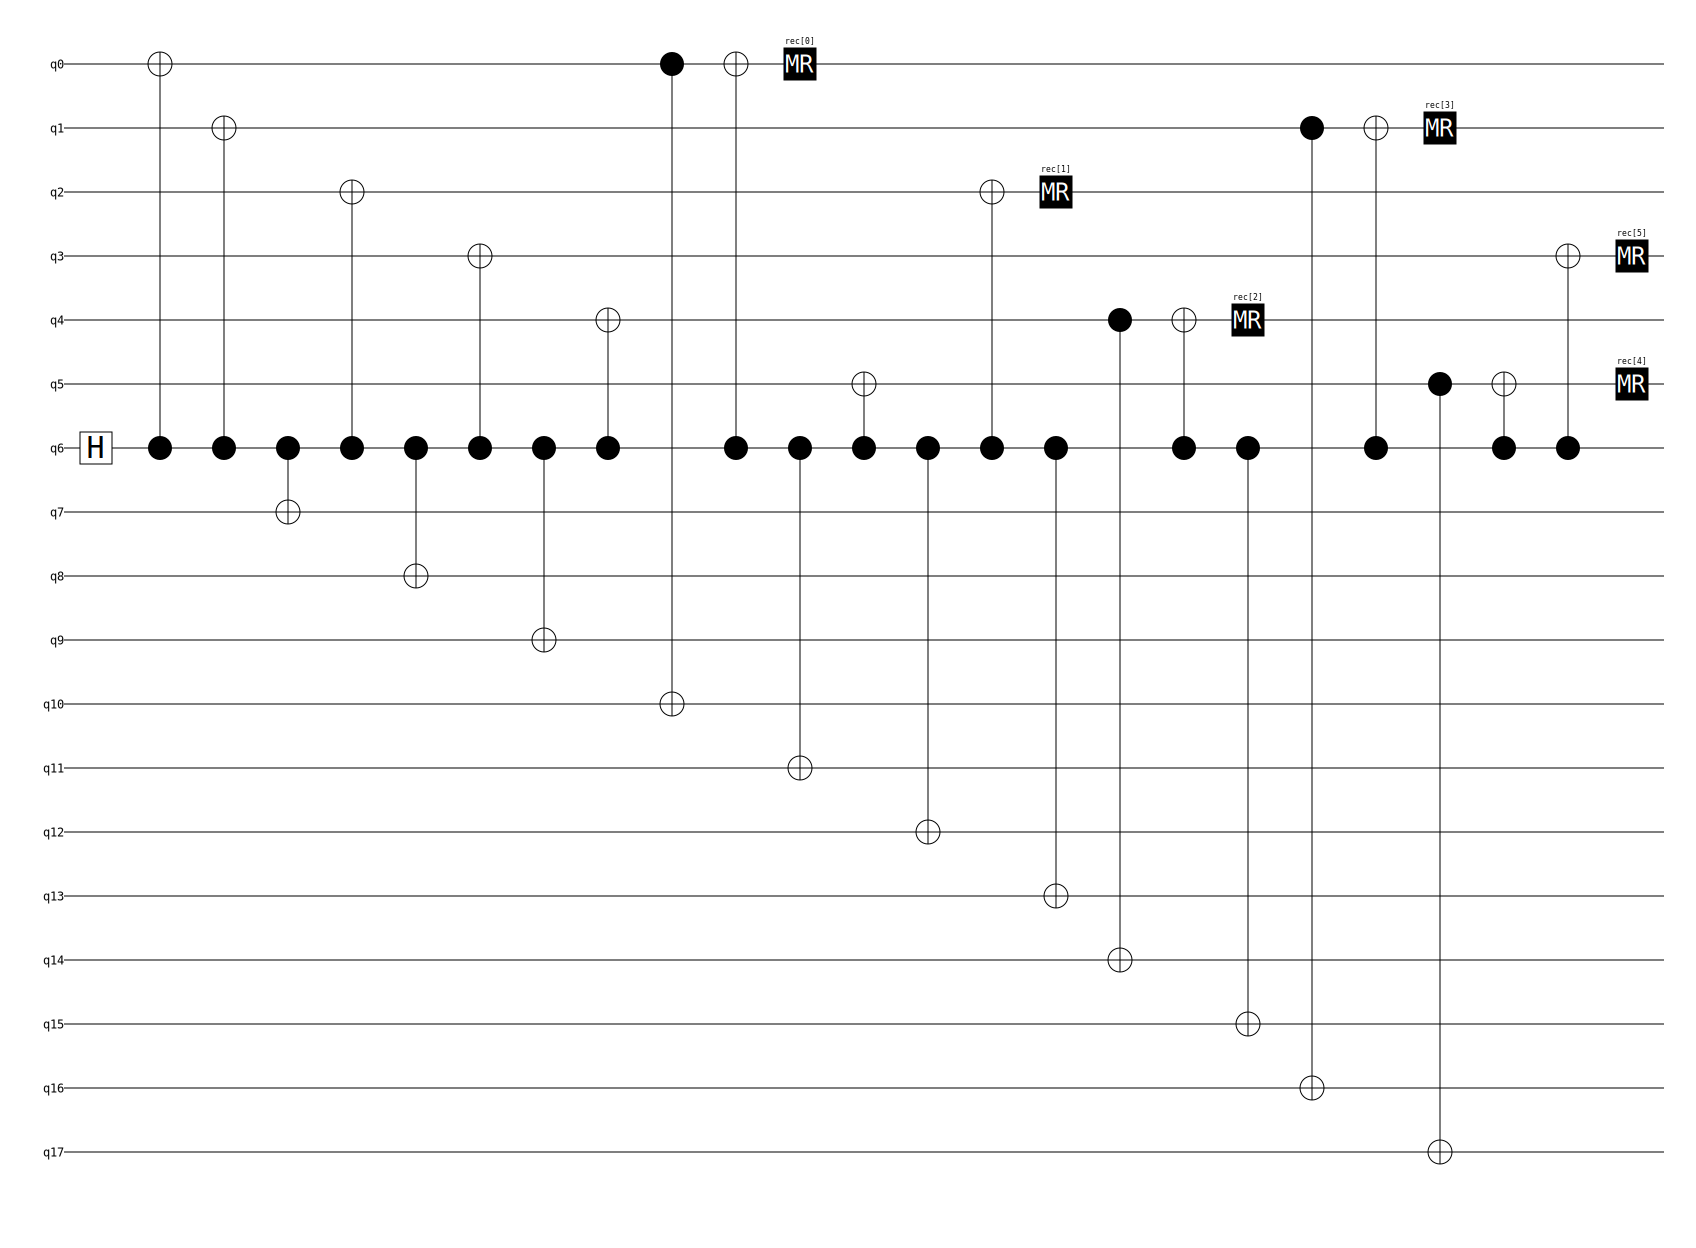

In [4]:
circ = cat_state_FT(12, 4)
circ.diagram('timeline-svg')

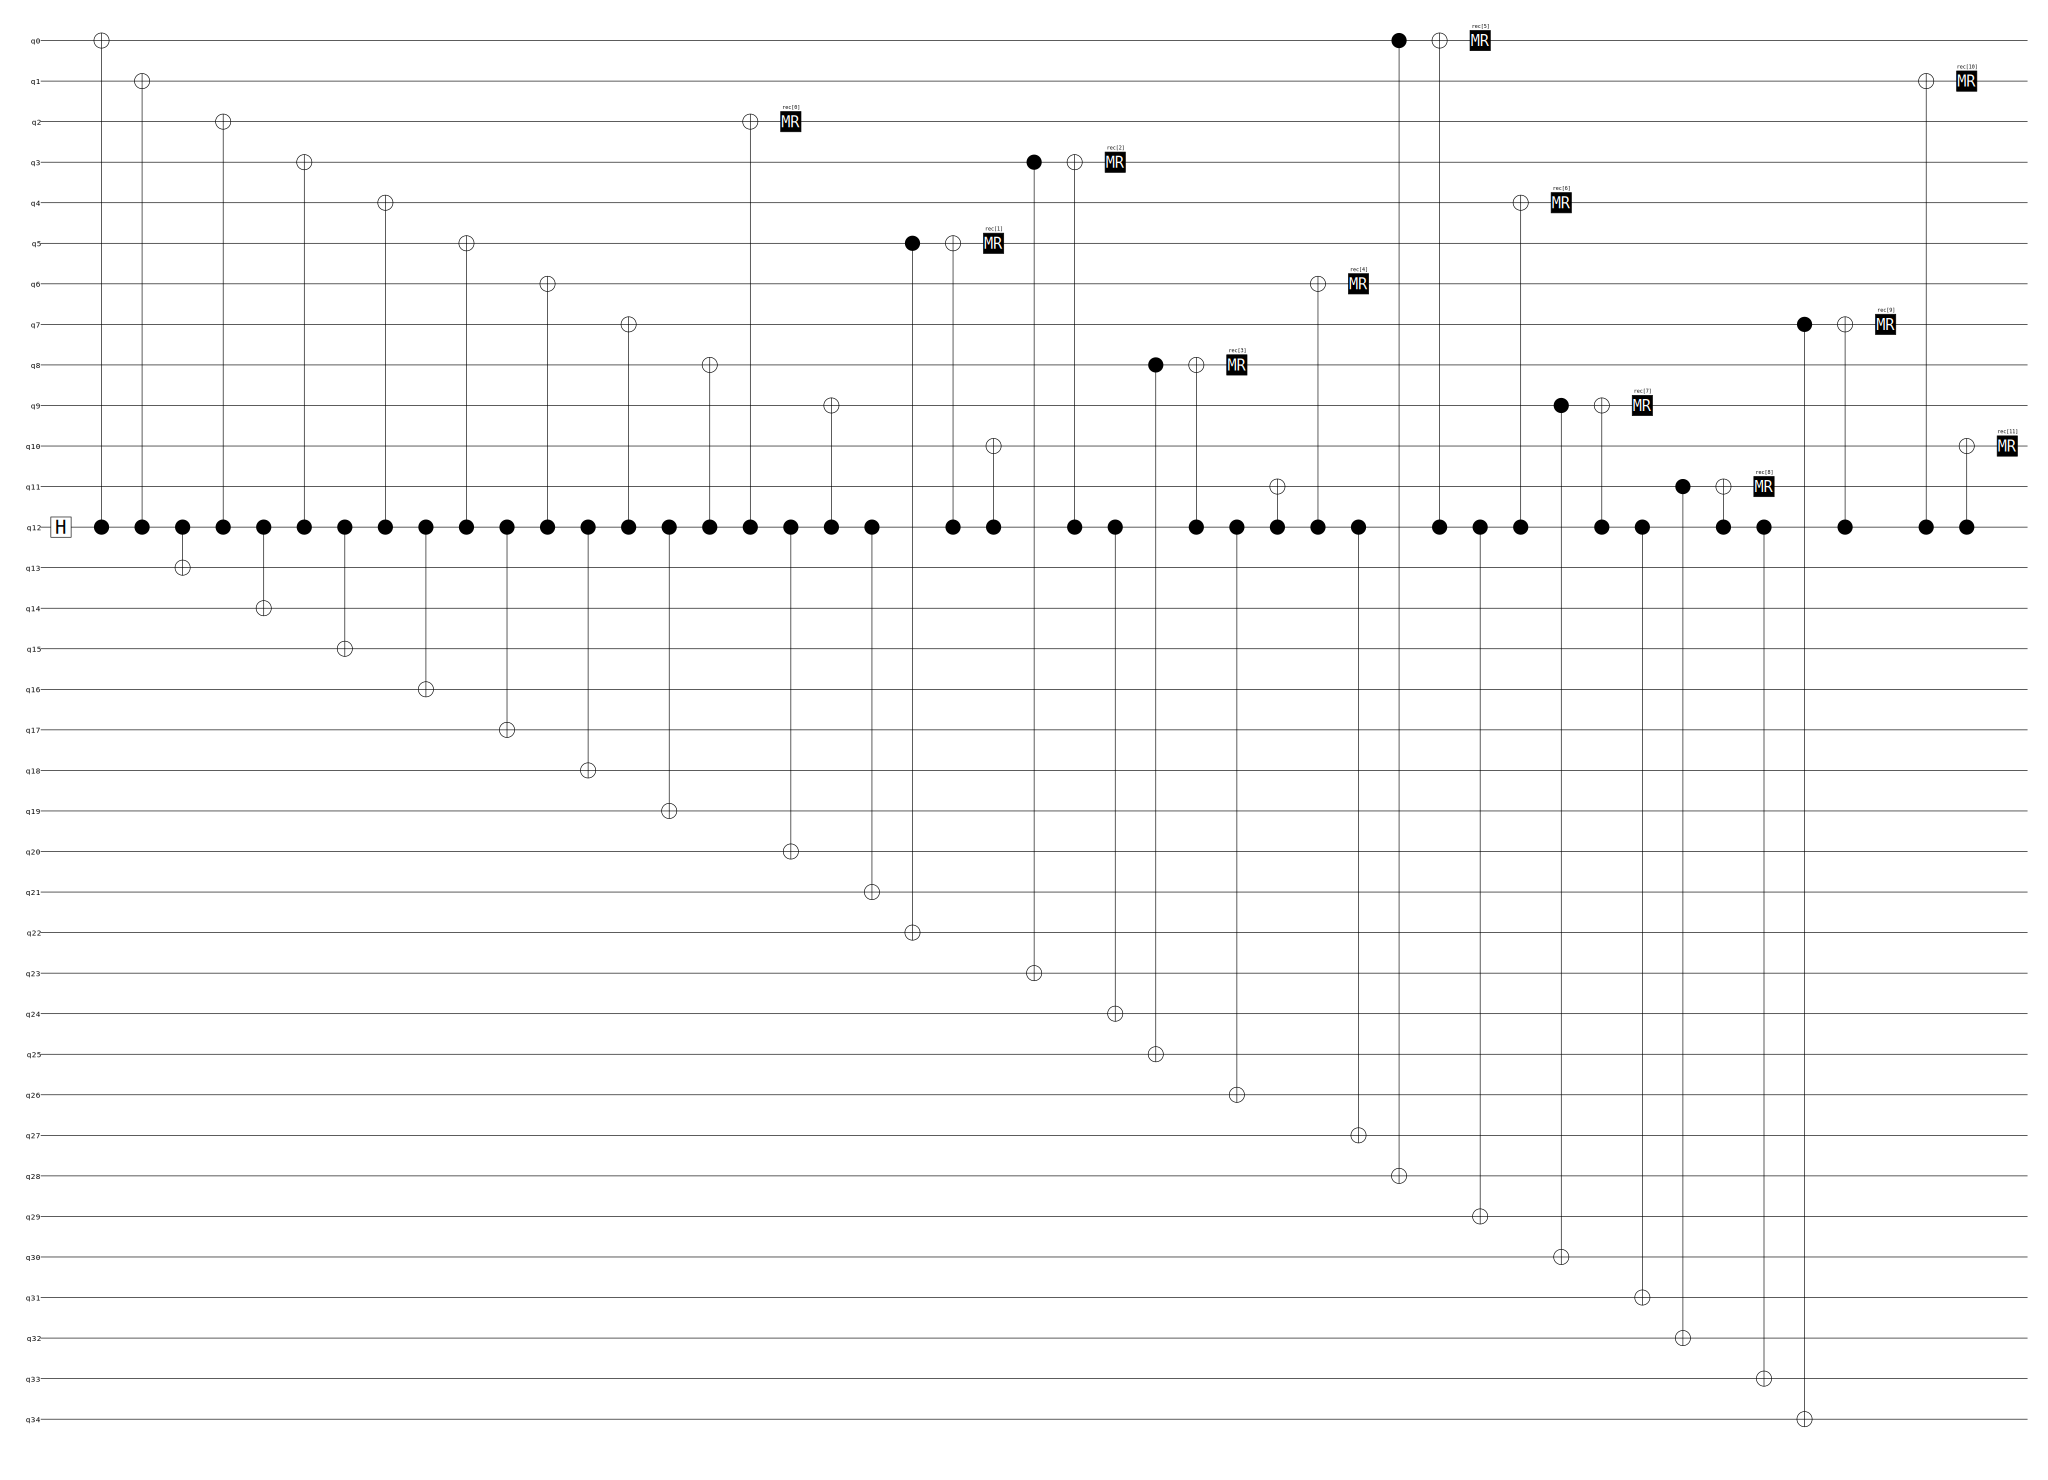

In [5]:
import stim


def sorted_pair(v1, v2):
    return (v1, v2) if v1 < v2 else (v2, v1)


circ = extract_circuit(G, list(zip(p, p[1:])), res1)
circ.diagram('timeline-svg')

In [6]:
circ.to_qasm(open_qasm_version=3)

'OPENQASM 3.0;\ninclude "stdgates.inc";\ndef mr(qubit q0) -> bit { bit b; measure q0 -> b; reset q0; return b; }\n\nqreg q[35];\ncreg rec[12];\n\nh q[12];\ncx q[12], q[0];\ncx q[12], q[1];\ncx q[12], q[13];\ncx q[12], q[2];\ncx q[12], q[14];\ncx q[12], q[3];\ncx q[12], q[15];\ncx q[12], q[4];\ncx q[12], q[16];\ncx q[12], q[5];\ncx q[12], q[17];\ncx q[12], q[6];\ncx q[12], q[18];\ncx q[12], q[7];\ncx q[12], q[19];\ncx q[12], q[8];\ncx q[12], q[2];\nrec[0] = mr(q[2]);\ncx q[12], q[20];\ncx q[12], q[9];\ncx q[12], q[21];\ncx q[5], q[22];\ncx q[12], q[5];\nrec[1] = mr(q[5]);\ncx q[12], q[10];\ncx q[3], q[23];\ncx q[12], q[3];\nrec[2] = mr(q[3]);\ncx q[12], q[24];\ncx q[8], q[25];\ncx q[12], q[8];\nrec[3] = mr(q[8]);\ncx q[12], q[26];\ncx q[12], q[11];\ncx q[12], q[6];\nrec[4] = mr(q[6]);\ncx q[12], q[27];\ncx q[0], q[28];\ncx q[12], q[0];\nrec[5] = mr(q[0]);\ncx q[12], q[29];\ncx q[12], q[4];\nrec[6] = mr(q[4]);\ncx q[9], q[30];\ncx q[12], q[9];\nrec[7] = mr(q[9]);\ncx q[12], q[31];\ncx q[

In [ ]:
from cat_state_generation import cat_state_FT

cat_state_FT(48, 4).diagram('timeline-svg')

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

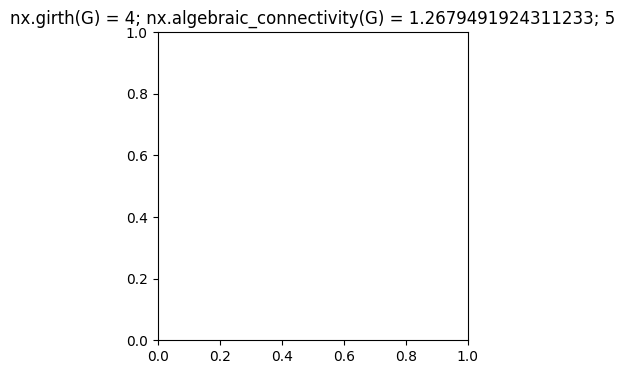

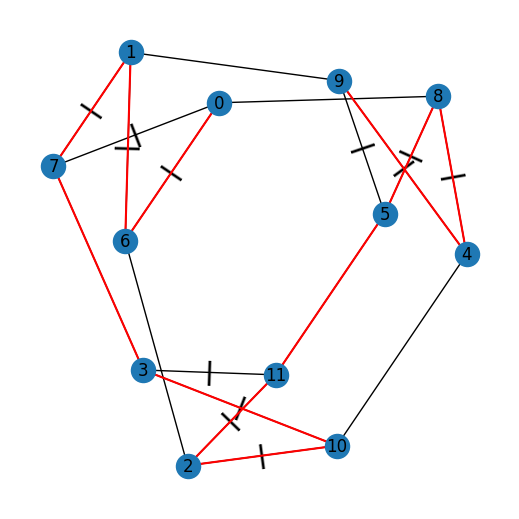

In [5]:
from cat_state_generation import *
from find_cubic_local_mincut import *

N, T = 12, 5
#
# def visualize_cat_state_base(G, ham_path, markings):
#     plt.figure(figsize=(5, 5))
#     pos = nx.circular_layout(G) # Kamada-Kawai usually looks best for regular graphs
#     nx.draw(G, pos, with_labels=True)
#     nx.draw_networkx_edge_labels(G, pos, edge_labels={e: "  |  " * num_marks for e, num_marks in markings.items()},
#                                  font_size=18, font_weight='bold', bbox=dict(alpha=0))
#     nx.draw_networkx_edges(
#         G, pos=pos,
#         edgelist=ham_path,
#         edge_color='red', width=1.5
#     )
#     plt.show()

for i, G in enumerate(generate_all_cubic_graph_with_local_cuts(N, 0), 1):
    plt.figure(i, figsize=(4,4))
    p = list(find_all_hamiltonian_paths(G))
    p = p[0]
    ham_path = list(zip(p, p[1:]))
    marker = GraphMarker(G, ham_path, 12)
    sol = marker.find_necessary_solution(T=5)
    n_actual = (sum(sol.values()))
    if n_actual == N:
        plt.title(f"{nx.girth(G) = }; {nx.algebraic_connectivity(G) = }; {i}")
        plt.show()
        visualize_cat_state_base(G, ham_path, sol)
        break

In [2]:
has_small_nonlocal_cut(G, 2)

True

In [3]:
for b in nx.cycle_basis(Gs[1]):
    print(len(b), b)

NameError: name 'Gs' is not defined

In [4]:
i

85

In [5]:
45**6

8303765625

In [6]:
nx.is_regular_expander(G)
# nx.girth(nx.heawood_graph())

True

In [7]:
nx.spectrum.adjacency_spectrum(nx.heawood_graph())

array([ 3.        +0.j, -3.        +0.j,  1.41421356+0.j, -1.41421356+0.j,
       -1.41421356+0.j, -1.41421356+0.j,  1.41421356+0.j,  1.41421356+0.j,
       -1.41421356+0.j,  1.41421356+0.j, -1.41421356+0.j,  1.41421356+0.j,
        1.41421356+0.j, -1.41421356+0.j])

In [1]:
from find_cubic_local_mincut import *
from cat_state_generation import *

N, T = 12, 5
for i, G in enumerate(generate_all_cubic_graph_with_local_cuts(N, 0), 1):
    print(i)
    for marks in generate_markings(G, N):
        if verify_marking_property(G, marks, T):
            visualize_cat_state_base(G, [], marks)

1
0 1 2 3 4 5 
2
0 1 2 3 4 5 
3
0 1 2 3 4 5 
4
0 1 2 3 4 5 
5
0 1 2 3 4 5 
6
0 1 2 3 4 5 
7
0 1 2 3 4 5 
8
0 1 2 3 4 5 
9
0 1 2 3 4 5 
10
0 1 2 3 4 5 
11
0 1 2 3 4 5 
12
0 1 2 3 4 5 
13
0 1 2 3 4 5 
14
0 1 2 3 4 5 
15
0 1 2 3 4 5 
16
0 1 2 3 4 5 
17
0 1 2 3 4 5 
18
0 1 2 3 4 5 
19
0 1 2 3 4 5 
20
0 1 2 3 4 5 
21
0 1 2 3 4 5 
22
0 1 2 3 4 5 
23
0 1 2 3 4 5 
24
0 1 2 3 4 5 
25
0 1 2 3 4 5 
26
0 1 2 3 4 5 
27
0 1 2 3 4 5 
28
0 1 2 3 4 5 
29
0 1 2 3 4 5 
30
0 1 2 3 4 5 
31
0 1 2 3 4 5 
32
0 1 2 3 4 5 
33
0 1 2 3 4 5 
34
0 1 2 3 4 5 
35
0 1 2 3 4 5 
36
0 1 2 3 4 5 
37
0 1 2 3 4 5 
38
0 1 2 3 4 5 
39
0 1 2 3 4 5 
40
0 1 2 3 4 5 
41
0 1 2 3 4 5 
42
0 1 2 3 4 5 
43
0 1 2 3 4 5 
44
0 1 2 3 4 5 
45
0 1 2 3 4 5 
46
0 1 2 3 4 5 
47
0 1 2 3 4 5 
48
0 1 2 3 4 5 
49
0 1 2 3 4 5 
50
0 1 2 3 4 5 
51
0 1 2 3 4 5 
52
0 1 2 3 4 5 
53
0 1 2 3 4 5 
54
0 1 2 3 4 5 
55
0 1 2 3 4 5 
56
0 1 2 3 4 5 
57
0 1 2 3 4 5 
58
0 1 2 3 4 5 
59
0 1 2 3 4 5 
60
0 1 2 3 4 5 
61
0 1 2 3 4 5 
62
0 1 2 3 4 5 
63
0 1 2 3 4 5 
6

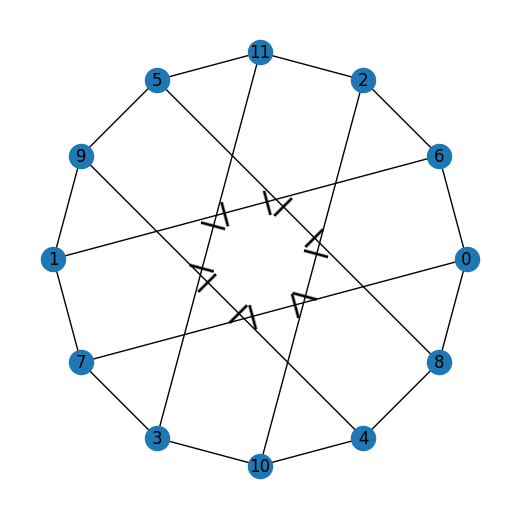

In [4]:
# for i, G in enumerate(generate_all_cubic_graph_with_local_cuts(N, 0), 1):
#     if i == 5:
#         break

def visualize_cat_state_base(G, ham_path, markings):
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={e: "  |  " * num_marks for e, num_marks in markings.items()},
                                 font_size=18, font_weight='bold', bbox=dict(alpha=0))
    nx.draw_networkx_edges(
        G, pos=pos,
        edgelist=ham_path,
        edge_color='red', width=1.5
    )
    plt.show()

pos = {0: np.array([1.00000000e+00, 1.97028653e-08]),
 6: np.array([0.86602539, 0.50000001]),
 2: np.array([0.49999998, 0.86602545]),
 11: np.array([-2.36778241e-08,  1.00000000e+00]),
 5: np.array([-0.50000003,  0.86602539]),
 9: np.array([-0.86602535,  0.50000007]),
 1: np.array([-9.99999960e-01, -6.77199095e-08]),
 7: np.array([-0.86602541, -0.49999994]),
 3: np.array([-0.49999988, -0.86602541]),
 10: np.array([ 3.19584437e-08, -9.99999960e-01]),
 4: np.array([ 0.49999992, -0.86602541]),
 8: np.array([ 0.86602533, -0.50000015])}
marks = {
    (11, 3): 2,
    (2, 10): 2,
    (5, 8): 2,
    (9, 4): 2,
    (1, 6): 2,
    (7, 0): 2
}
visualize_cat_state_base(G, [], marks)

In [5]:
verify_marking_property(G, marks, T)

(0, 2, 6)

In [5]:
[(i, (i+1) % N) for i in range(N)]

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 0)]

In [3]:
N


12

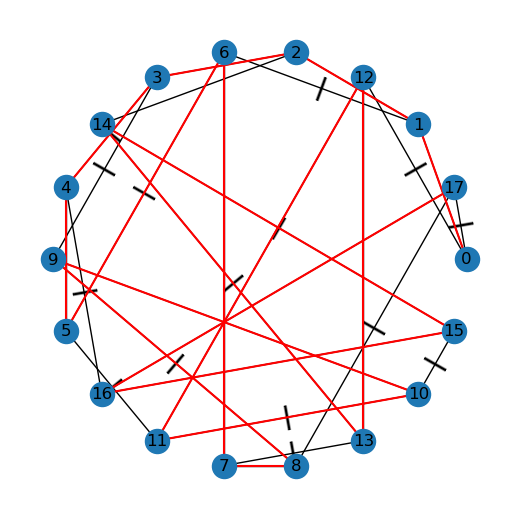

In [2]:
import networkx as nx
import numpy as np
from markings import find_marking_property_violation
from cat_state_generation import visualize_cat_state_base
from cat_graphs_circular import find_t_non_local_cut

G = nx.from_edgelist(
    [(0, 17), (0, 1), (0, 12), (1, 2), (1, 6), (2, 3), (2, 14), (3, 4), (3, 9), (4, 5), (4, 16), (5, 6), (5, 11), (6, 7), (7, 8), (7, 13), (8, 9), (8, 17), (9, 10), (10, 11), (10, 15), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17)]
)
ham_path = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17)]
marks = {(0, 17): 1, (0, 1): 0, (0, 12): 1, (1, 2): 0, (1, 6): 1, (2, 3): 0, (2, 14): 0, (3, 4): 1, (3, 9): 1, (4, 5): 0, (4, 16): 1, (5, 6): 1, (5, 11): 1, (6, 7): 0, (7, 8): 0, (7, 13): 1, (8, 9): 1, (8, 17): 1, (9, 10): 0, (10, 11): 1, (10, 15): 1, (11, 12): 0, (12, 13): 0, (13, 14): 1, (14, 15): 1, (15, 16): 0, (16, 17): 0}



visualize_cat_state_base(G, ham_path, marks)
# cut = find_small_nonlocal_cut(G, 5)
# cut, find_t_non_local_cut(G, 5)